Importa o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar o arquivo

In [ ]:
import pandas as pd

# Lê o arquivo CSV
df = pd.read_csv("/content/drive/MyDrive/Trabalho de IA Linguamatica/frases-musicas-final.csv")

# Remove linhas com valores nulos na coluna 'tem_padrao'
df = df.dropna(subset=['tem_padrao'])

# Normaliza para evitar problemas com maiúsculas/minúsculas
df['tem_padrao'] = df['tem_padrao'].str.strip().str.lower()

# Filtro exato: apenas 'female' e apenas 'male'
female_df = df[df['tem_padrao'] == 'female']
male_df = df[df['tem_padrao'] == 'male']

# Seleção aleatória de até 10.000 frases de cada
female_sample = female_df.sample(n=min(5000, len(female_df)), random_state=42)
male_sample = male_df.sample(n=min(5000, len(male_df)), random_state=42)
# print(f"Tamanho da amostra 'Female': {len(female_sample)}")
# print(f"Tamanho da amostra 'Male': {len(male_sample)}")

# Exibe amostras
print("Amostra de frases com padrão 'Female':")
print(female_sample[['frase']])

print("\nAmostra de frases com padrão 'Male':")
print(male_sample[['frase']])

# Contagens exatas
female_count = len(female_df)
male_count = len(male_df)

print(f"\nTotal de frases com padrão 'Female': {female_count}")
print(f"Total de frases com padrão 'Male': {male_count}")



Tamanho da amostra 'Female': 5000
Tamanho da amostra 'Male': 5000
Amostra de frases com padrão 'Female':
                                              frase
1768616                       Sem ela não é moleza.
850769             Para seu desejo de mulher fatal.
1317272  Tem mulher quietinha, tem mulher cachorra.
1157794    pra piorar ela tá grávida de um vacilão.
918408                           Mulher mercenária.
...                                             ...
1524697                            Vem menina moça.
2548132     É mulher perigosa, é mulher perigosa\n.
2141557      existem muitas mulheres lindas por aí.
1524986     Só pra contrariar, ela ainda é donzela.
56456          Da um play ae que ela tava carente,.

[5000 rows x 1 columns]

Amostra de frases com padrão 'Male':
                                                     frase
2052196               Você mais cansado e ele mais rico\n.
1692478                                     O menino azul.
1549238  Ela sabe que ele é gos

<ipython-input-5-7195bbcdbbfa>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tem_padrao'] = df['tem_padrao'].str.strip().str.lower()


Baixar as dependencias

In [ ]:
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -U transformers sentence-transformers bertopic umap-learn scikit-learn pandas matplotlib


Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu124
    Uninstalling torchaudio-2.5

embeddings com o BERTimbau

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")
model.eval()

# Função para gerar embedding médio da frase
def embed_frase(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Gera embeddings para cada conjunto
print("Gerando embeddings para 'Female'...")
female_embeddings = [embed_frase(f) for f in tqdm(female_sample['frase'])]

print("Gerando embeddings para 'Male'...")
male_embeddings = [embed_frase(f) for f in tqdm(male_sample['frase'])]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Gerando embeddings para 'Female'...


  0%|          | 8/5000 [00:00<08:00, 10.39it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

100%|██████████| 5000/5000 [09:36<00:00,  8.68it/s]


Gerando embeddings para 'Male'...


100%|██████████| 5000/5000 [09:58<00:00,  8.35it/s]


KMEANS

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Clustering para female
kmeans_female = KMeans(n_clusters=30, random_state=42)
female_labels = kmeans_female.fit_predict(female_embeddings)

# Clustering para male
kmeans_male = KMeans(n_clusters=30, random_state=42)
male_labels = kmeans_male.fit_predict(male_embeddings)

# Adiciona os rótulos aos DataFrames
female_sample = female_sample.copy()
female_sample['kmeans_label'] = female_labels

male_sample = male_sample.copy()
male_sample['kmeans_label'] = male_labels

# Mostra exemplos de clusters - Female
print("\n=== KMeans Clusters (Female) ===")
for i in range(3):
    print(f"\n--- Cluster {i} (Female) ---")
    print(female_sample[female_sample['kmeans_label'] == i]['frase'].head(3).to_string(index=False))

# Mostra exemplos de clusters - Male
print("\n=== KMeans Clusters (Male) ===")
for i in range(3):
    print(f"\n--- Cluster {i} (Male) ---")
    print(male_sample[male_sample['kmeans_label'] == i]['frase'].head(3).to_string(index=False))



=== KMeans Clusters (Female) ===

--- Cluster 0 (Female) ---
                  Ela é a mulher mais divina,.
              Que ela é a luz que me traz paz.
Por ela preto e branco vivem numa grande luta.

--- Cluster 1 (Female) ---
Vendo ela chora quando você saia,caia na gandai...
                          Ela ficou descontrolada.
            Esquarteja o corpo da filha inteiro\n.

--- Cluster 2 (Female) ---
            Ela é bonita, é gostosa e é prendada,.
Mas em casa ela é diferente a novinha quer paga...
        E ser chamada de gostosa pra ela é normal.

=== KMeans Clusters (Male) ===

--- Cluster 0 (Male) ---
  Ele é nordestino e não foge sem lutar.
Almir-Rato agora é professor de natação.
     ele é merecedor de levantar a taça.

--- Cluster 1 (Male) ---
Igual titãs, homem primata.
   Para o homem explorador.
  Vacilão tem homem ruim ,.

--- Cluster 2 (Male) ---
                   Fala pra ele que ele foi usado.
      Pra que ele faça boa viagem nessa passagem!.
Esse menino é es

<ipython-input-15-e74db7f802d6>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  female_colors = plt.cm.get_cmap('tab20', n_clusters)
<ipython-input-15-e74db7f802d6>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  male_colors = plt.cm.get_cmap('tab20', n_clusters)


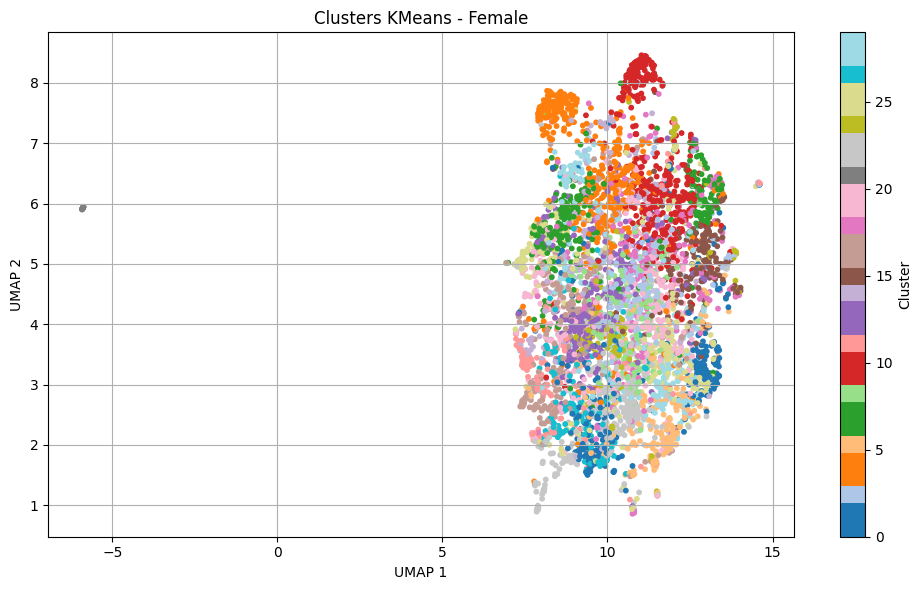

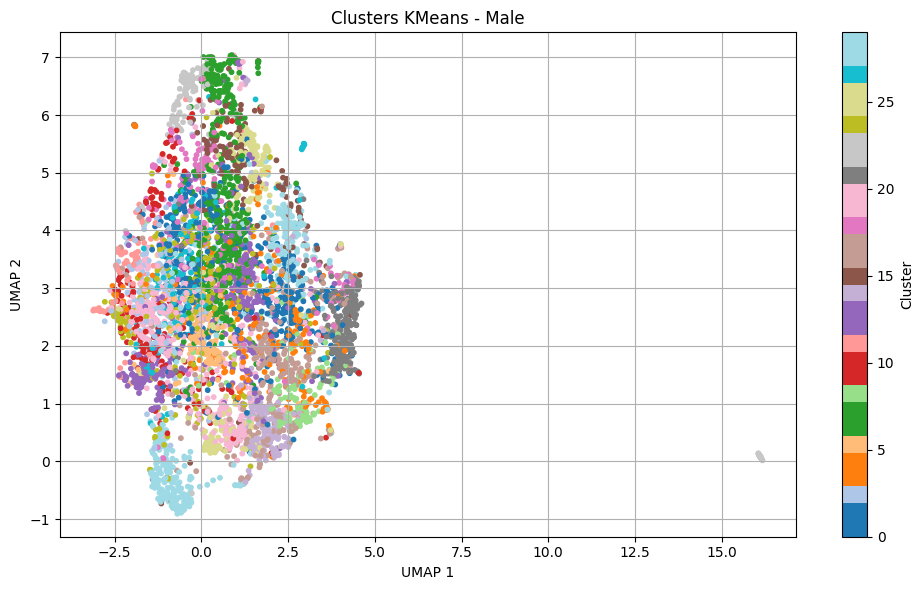

In [ ]:
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import numpy as np

# Clustering com 30 clusters
n_clusters = 30

# Female
kmeans_female = KMeans(n_clusters=n_clusters, random_state=42)
female_labels = kmeans_female.fit_predict(female_embeddings)
female_sample = female_sample.copy()
female_sample['kmeans_label'] = female_labels

# Male
kmeans_male = KMeans(n_clusters=n_clusters, random_state=42)
male_labels = kmeans_male.fit_predict(male_embeddings)
male_sample = male_sample.copy()
male_sample['kmeans_label'] = male_labels

# Redução de dimensionalidade com UMAP (Female)
reducer_female = umap.UMAP(random_state=42)
female_2d = reducer_female.fit_transform(female_embeddings)

# Redução de dimensionalidade com UMAP (Male)
reducer_male = umap.UMAP(random_state=42)
male_2d = reducer_male.fit_transform(male_embeddings)

# Cores
female_colors = plt.cm.get_cmap('tab20', n_clusters)
male_colors = plt.cm.get_cmap('tab20', n_clusters)

# Plot Female
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    female_2d[:, 0],
    female_2d[:, 1],
    c=female_labels,
    cmap=female_colors,
    s=10
)
plt.title("Clusters KMeans - Female")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Male
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    male_2d[:, 0],
    male_2d[:, 1],
    c=male_labels,
    cmap=male_colors,
    s=10
)
plt.title("Clusters KMeans - Male")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


LDA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Para female
vectorizer_female = TfidfVectorizer(max_features=3000)
X_tfidf_female = vectorizer_female.fit_transform(female_sample['frase'])

lda_female = LatentDirichletAllocation(n_components=30, random_state=42)
lda_topic_matrix_female = lda_female.fit_transform(X_tfidf_female)
lda_labels_female = lda_topic_matrix_female.argmax(axis=1)

female_sample = female_sample.copy()
female_sample['lda_label'] = lda_labels_female

# Para male
vectorizer_male = TfidfVectorizer(max_features=3000)
X_tfidf_male = vectorizer_male.fit_transform(male_sample['frase'])

lda_male = LatentDirichletAllocation(n_components=30, random_state=42)
lda_topic_matrix_male = lda_male.fit_transform(X_tfidf_male)
lda_labels_male = lda_topic_matrix_male.argmax(axis=1)

male_sample = male_sample.copy()
male_sample['lda_label'] = lda_labels_male

# Mostrar exemplos - Female
print("\n=== LDA Tópicos (Female) ===")
for i in range(3):
    print(f"\n--- Tópico {i} (Female) ---")
    print(female_sample[female_sample['lda_label'] == i]['frase'].head(3).to_string(index=False))

# Mostrar exemplos - Male
print("\n=== LDA Tópicos (Male) ===")
for i in range(3):
    print(f"\n--- Tópico {i} (Male) ---")
    print(male_sample[male_sample['lda_label'] == i]['frase'].head(3).to_string(index=False))



=== LDA Tópicos (Female) ===

--- Tópico 0 (Female) ---
Ela é bonita, é gostosa e é prendada,.
        Moças bonitas vinha à janela,.
                 Ela já não é mocinha.

--- Tópico 1 (Female) ---
          Ela sabe ser gostosa sabe me conquistar.
         Silvia tá presente,renatinho ..tá também.
torcendo pra que ela mesma descubra no meu jeit...

--- Tópico 2 (Female) ---
                    Sem ela não é moleza.
      Fonte de prazer que mulher gostosa.
Toda menina baiana vive na maior moleza..

=== LDA Tópicos (Male) ===

--- Tópico 0 (Male) ---
   Mas me diga a cor moço ética nunca teve dono\n.
Meu copo tava pink, joguei cinco e ele ficou mu...
           Que fiz um papel de um homem covarde\n.

--- Tópico 1 (Male) ---
                       Era um homem perigoso.
      O meu irmão zé tá louco por uma menina.
Conheci um moço pobre, honrado e trabalhador.

--- Tópico 2 (Male) ---
          Ele não é dado pra ciúme.
a uma hora atrás ele estava comigo.
              Moço valente 

<ipython-input-17-84979449054e>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  female_colors = plt.cm.get_cmap('tab20', n_topics)
<ipython-input-17-84979449054e>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  male_colors = plt.cm.get_cmap('tab20', n_topics)


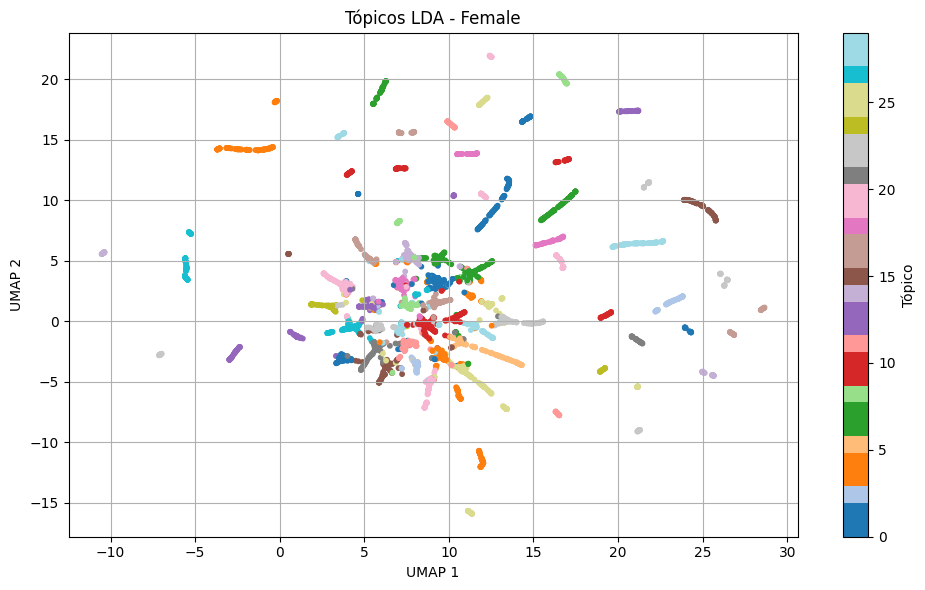

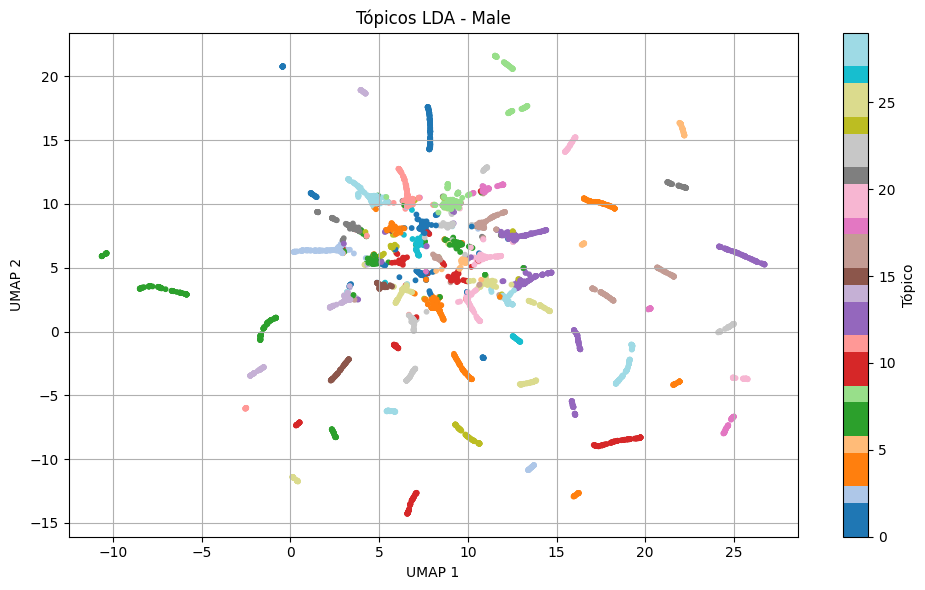

In [ ]:
import umap
import matplotlib.pyplot as plt

n_topics = 30  # Número de tópicos do LDA

# Redução de dimensionalidade UMAP para female
reducer_female = umap.UMAP(random_state=42)
lda_2d_female = reducer_female.fit_transform(lda_topic_matrix_female)  # lda_topic_matrix_female do seu LDA fem

# Redução de dimensionalidade UMAP para male
reducer_male = umap.UMAP(random_state=42)
lda_2d_male = reducer_male.fit_transform(lda_topic_matrix_male)  # lda_topic_matrix_male do seu LDA male

# Colormap categórico para 30 tópicos
female_colors = plt.cm.get_cmap('tab20', n_topics)
male_colors = plt.cm.get_cmap('tab20', n_topics)

# Plot Female LDA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    lda_2d_female[:, 0],
    lda_2d_female[:, 1],
    c=lda_labels_female,
    cmap=female_colors,
    s=10
)
plt.title("Tópicos LDA - Female")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Tópico')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Male LDA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    lda_2d_male[:, 0],
    lda_2d_male[:, 1],
    c=lda_labels_male,
    cmap=male_colors,
    s=10
)
plt.title("Tópicos LDA - Male")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Tópico')
plt.grid(True)
plt.tight_layout()
plt.show()


Bertopic

In [ ]:
import numpy as np
from bertopic import BERTopic

# Female
female_embeddings_np = np.vstack(female_embeddings)  # garante np.array
topic_model_female = BERTopic(language="multilingual", embedding_model=model)
female_topics, female_probs = topic_model_female.fit_transform(female_sample['frase'], female_embeddings_np)
female_sample = female_sample.copy()
female_sample['bertopic_label'] = female_topics

# Male
male_embeddings_np = np.vstack(male_embeddings)
topic_model_male = BERTopic(language="multilingual", embedding_model=model)
male_topics, male_probs = topic_model_male.fit_transform(male_sample['frase'], male_embeddings_np)
male_sample = male_sample.copy()
male_sample['bertopic_label'] = male_topics

# Exibir exemplos - Female
print("\n=== BERTopic Tópicos (Female) ===")
for i in range(3):
    print(f"\n--- Tópico {i} (Female) ---")
    print(female_sample[female_sample['bertopic_label'] == i]['frase'].head(3).to_string(index=False))

# Exibir exemplos - Male
print("\n=== BERTopic Tópicos (Male) ===")
for i in range(3):
    print(f"\n--- Tópico {i} (Male) ---")
    print(male_sample[male_sample['bertopic_label'] == i]['frase'].head(3).to_string(index=False))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


=== BERTopic Tópicos (Female) ===

--- Tópico 0 (Female) ---
        Moças bonitas vinha à janela,.
                 Mulheres locomotivas.
Esposas ciumentas, maridos que fogem,.

--- Tópico 1 (Female) ---
                Menina sozinha, se sentiu trocada.
                          Ela ficou descontrolada.
Minha mãe estava muito doente, pra mim foi um g...

--- Tópico 2 (Female) ---
           Ela é poderosa.
Ela é mistura, piracema\n.
  Ela não vai fazer igual.

=== BERTopic Tópicos (Male) ===

--- Tópico 0 (Male) ---
           O meu irmão zé tá louco por uma menina.
               Nois vai raja, bota eles pra volta.
Mais garoto primeiro você tem que saber jogar o...

--- Tópico 1 (Male) ---
                               eles ficam iguais.
Meninos virgens de sofrimento na vida vão peidar.
                        Todos eles são valente\n.

--- Tópico 2 (Male) ---
                               Vovô era retireiro.
                            O Caboclo era soldado.
Fulano regenerado po

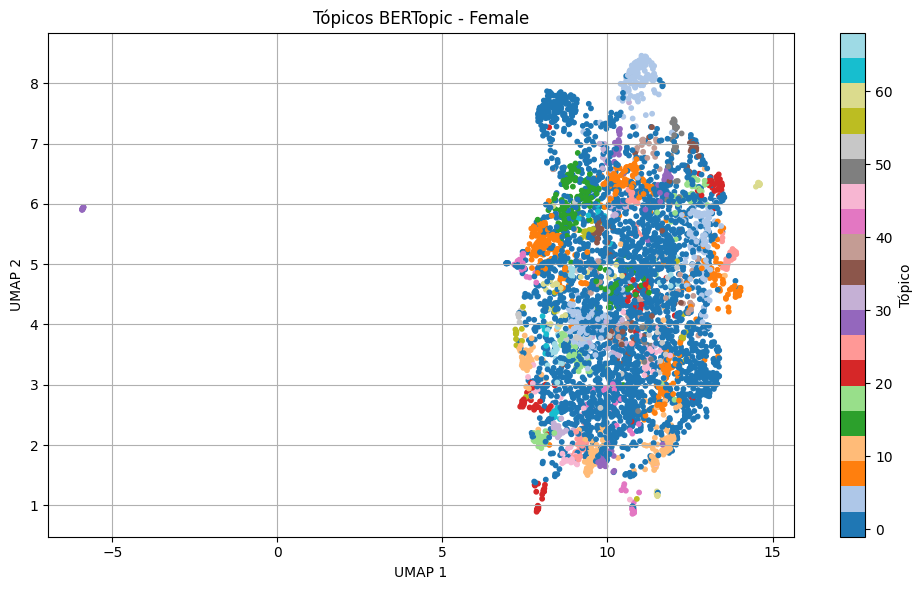

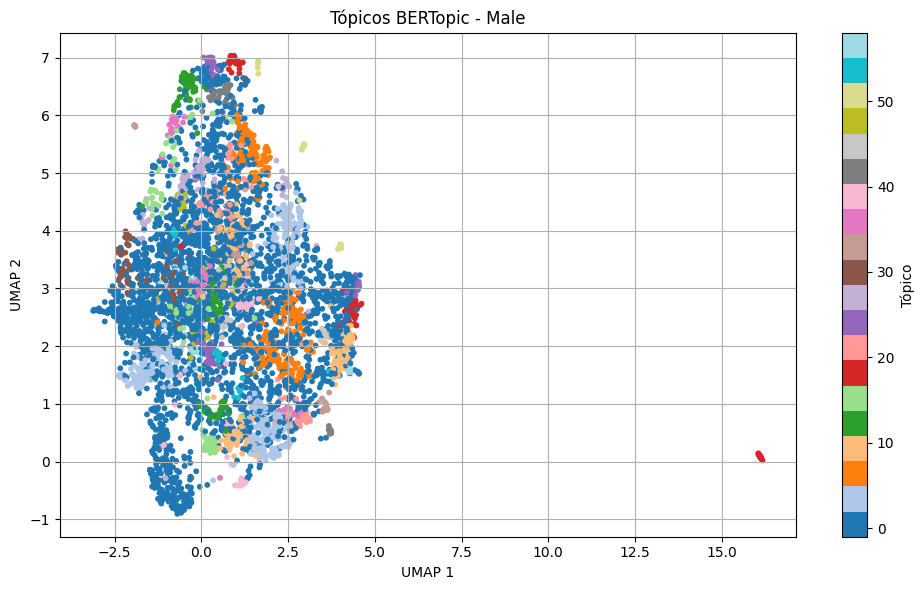

In [ ]:

import umap
import matplotlib.pyplot as plt

# Female
reducer_female = umap.UMAP(random_state=42)
embedding_2d_female = reducer_female.fit_transform(np.vstack(female_embeddings))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    embedding_2d_female[:, 0],
    embedding_2d_female[:, 1],
    c=female_sample['bertopic_label'],
    cmap='tab20',
    s=10
)
plt.title("Tópicos BERTopic - Female")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Tópico')
plt.grid(True)
plt.tight_layout()
plt.show()


# Male
reducer_male = umap.UMAP(random_state=42)
embedding_2d_male = reducer_male.fit_transform(np.vstack(male_embeddings))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    embedding_2d_male[:, 0],
    embedding_2d_male[:, 1],
    c=male_sample['bertopic_label'],
    cmap='tab20',
    s=10
)
plt.title("Tópicos BERTopic - Male")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Tópico')
plt.grid(True)
plt.tight_layout()
plt.show()


Exportar

In [ ]:
# --- KMeans ---

# Female
kmeans_grouped_female = female_sample.groupby('kmeans_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
kmeans_grouped_female.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/kmeans_agrupado_female.csv', index=False)

# Male
kmeans_grouped_male = male_sample.groupby('kmeans_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
kmeans_grouped_male.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/kmeans_agrupado_male.csv', index=False)


# --- LDA ---

# Female
lda_grouped_female = female_sample.groupby('lda_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
lda_grouped_female.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/lda_agrupado_female.csv', index=False)

# Male
lda_grouped_male = male_sample.groupby('lda_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
lda_grouped_male.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/lda_agrupado_male.csv', index=False)


# --- BERTopic ---

# Female
bertopic_grouped_female = female_sample.groupby('bertopic_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
bertopic_grouped_female.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/bertopic_agrupado_female.csv', index=False)

# Male
bertopic_grouped_male = male_sample.groupby('bertopic_label')['frase'].apply(lambda x: '\n'.join(x)).reset_index()
bertopic_grouped_male.to_csv('/content/drive/MyDrive/Trabalho de IA Linguamatica/bertopic_agrupado_male.csv', index=False)

